# Imports

In [1]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import sys
import pickle
import plotnine as p9
import warnings
import importlib
import patchworklib as pw 

from plotnine import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from matplotlib.pyplot import figure
from collections import Counter
from matplotlib import pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

warnings.filterwarnings('ignore')
en = spacy.load("en_core_web_md")
en.add_pipe('spacytextblob')
nltk.download('punkt')
pd.options.plotting.backend = "plotly"
#sys.path.insert(0, 'C:/Users/Hubert/Dropbox/NLP/Project/eda_for_nlp_package.py')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hubert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 72x72 with 0 Axes>

## Eda package

In [2]:
import eda_for_nlp_package as eda
importlib.reload(eda)

<module 'eda_for_nlp_package' from 'c:\\Users\\Hubert\\Dropbox\\NLP\\Project\\EDA\\eda_for_nlp_package.py'>

# Data import

In our study we have dataset with 11 labels, representing different types of misleading articles (10), and a class of relaible articles. They were sampled from the original dataset with equal size of classes, 1000 observations per instance. Of course it does not represent the real distribution of those classes in original dataset, but let's us better distinguish among those types of articles.

In [3]:
df    = pd.read_csv('data_1000/main_df.csv')
tfidf = pd.read_csv('data_1000/top_tf-idf.csv')
df.head()

,Unnamed: 0,id,type,domain,scraped_at,url,authors,title,content,word_count,char_count,word_density,polarity,subjectivity,nouns,noun_chunks,entities,lemmas
0,0,7025856,political,dailykos.com,2017-11-27,https://www.dailykos.com/stories/2013/10/17/12...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",Classic Bachmann: Default avoided because Repu...,"Pssst, Michele, you just called yourself not a...",212,982,0.215666,0.154630,0.662191,"['adult', 'Pssst', 'adult', 'dice', 'adults', ...","['Michele', 'Republicans', 'default', 'intense...","['Pssst, Michele', 'Michele', 'Republicans', ""...","['Pssst', 'Michele', 'call', 'adult', 'pssst',..."
1,1,1966549,political,breitbart.com,2017-11-10,http://www.breitbart.com/jerusalem/2016/06/01/...,"Aaron Klein, Ali Waked","EXCLUSIVE: Hamas, Hezbollah Recruiting Fatah M...",TEL AVIV – The Israel Defense Forces on Monday...,367,1972,0.186011,0.046875,0.414167,"['city', 'refugee', 'camps', 'suspicion', 'pos...","['TEL AVIV', 'Monday', ' Palestinians', 'Nablu...","['TEL AVIV', 'The Israel Defense Forces', 'Pal...","['TEL', 'AVIV', 'Israel', 'Defense', 'Forces',..."
2,2,2628942,political,alternet.org,2017-11-13,https://www.alternet.org/environment/revealed-...,NaN,Revealed: FBI Terrorism Taskforce Investigatin...,Revealed: FBI Terrorism Taskforce Investigatin...,904,4889,0.184867,-0.039660,0.413462,"['leaders', 'movement', 'fear', 'terrorists', ...","['FBI Terrorism Taskforce', 'Standing Rock Act...","['FBI Terrorism Taskforce Investigating', 'Peg...","['reveal', 'FBI', 'Terrorism', 'Taskforce', 'i..."
3,3,3382763,political,dailykos.com,2017-11-18,https://www.dailykos.com/stories/2006/9/11/245...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",What's Condi Doing Today?,The Halifax Peace Coalition questioned the mot...,242,1221,0.198036,0.205208,0.407813,"['motivation', 'visit', 'relations', 'campaign...","['support', 'Afghanistan', 'Canadian troops', ...","['The Halifax Peace Coalition', 'Rice', 'Afgha...","['Halifax', 'Peace', 'Coalition', 'question', ..."
4,4,2034907,political,nationalreview.com,2017-11-10,http://www.nationalreview.com/corner/81541,Michael Ledeen,National Review,"Well, it’s very important, actually, because i...",337,1640,0.205363,0.127504,0.521075,"['hands', 'yellowcake', 'asset', 'president', ...","['Saddam', 'yellowcake', 'Niger', 'Seymour Her...","['Brits', 'Saddam', 'Niger', 'CIA', 'Seymour H...","['important', 'actually', 'explain', 'Brits', ..."


In [4]:
en = pickle.load(open("data_1000/en.pickle", "rb"))
docs = pickle.load(open("data_1000/docs.pickle", "rb"))

In [5]:
docs.head()

0    (Pssst, ,, Michele, ,, you, just, called, your...
1    (TEL, AVIV, –, The, Israel, Defense, Forces, o...
2    (Revealed, :, FBI, Terrorism, Taskforce, Inves...
3    (The, Halifax, Peace, Coalition, questioned, t...
4    (Well, ,, it, ’s, very, important, ,, actually...
Name: content, dtype: object

# Basic plots

## Word counts comparison

Firstly, we analyzed the word counts of given texts, and compare them between all 11 classes. As we can see, text length distributions differ between each other, although not too much.

We can see that the distribution of reliable articles is slightly different from global distribution. Quite interestingly it is very close to bias, and political texts. We can see that major differences occur for hate, junkscience, fale, and unreliable articles.

the unknown class folows the global distribution

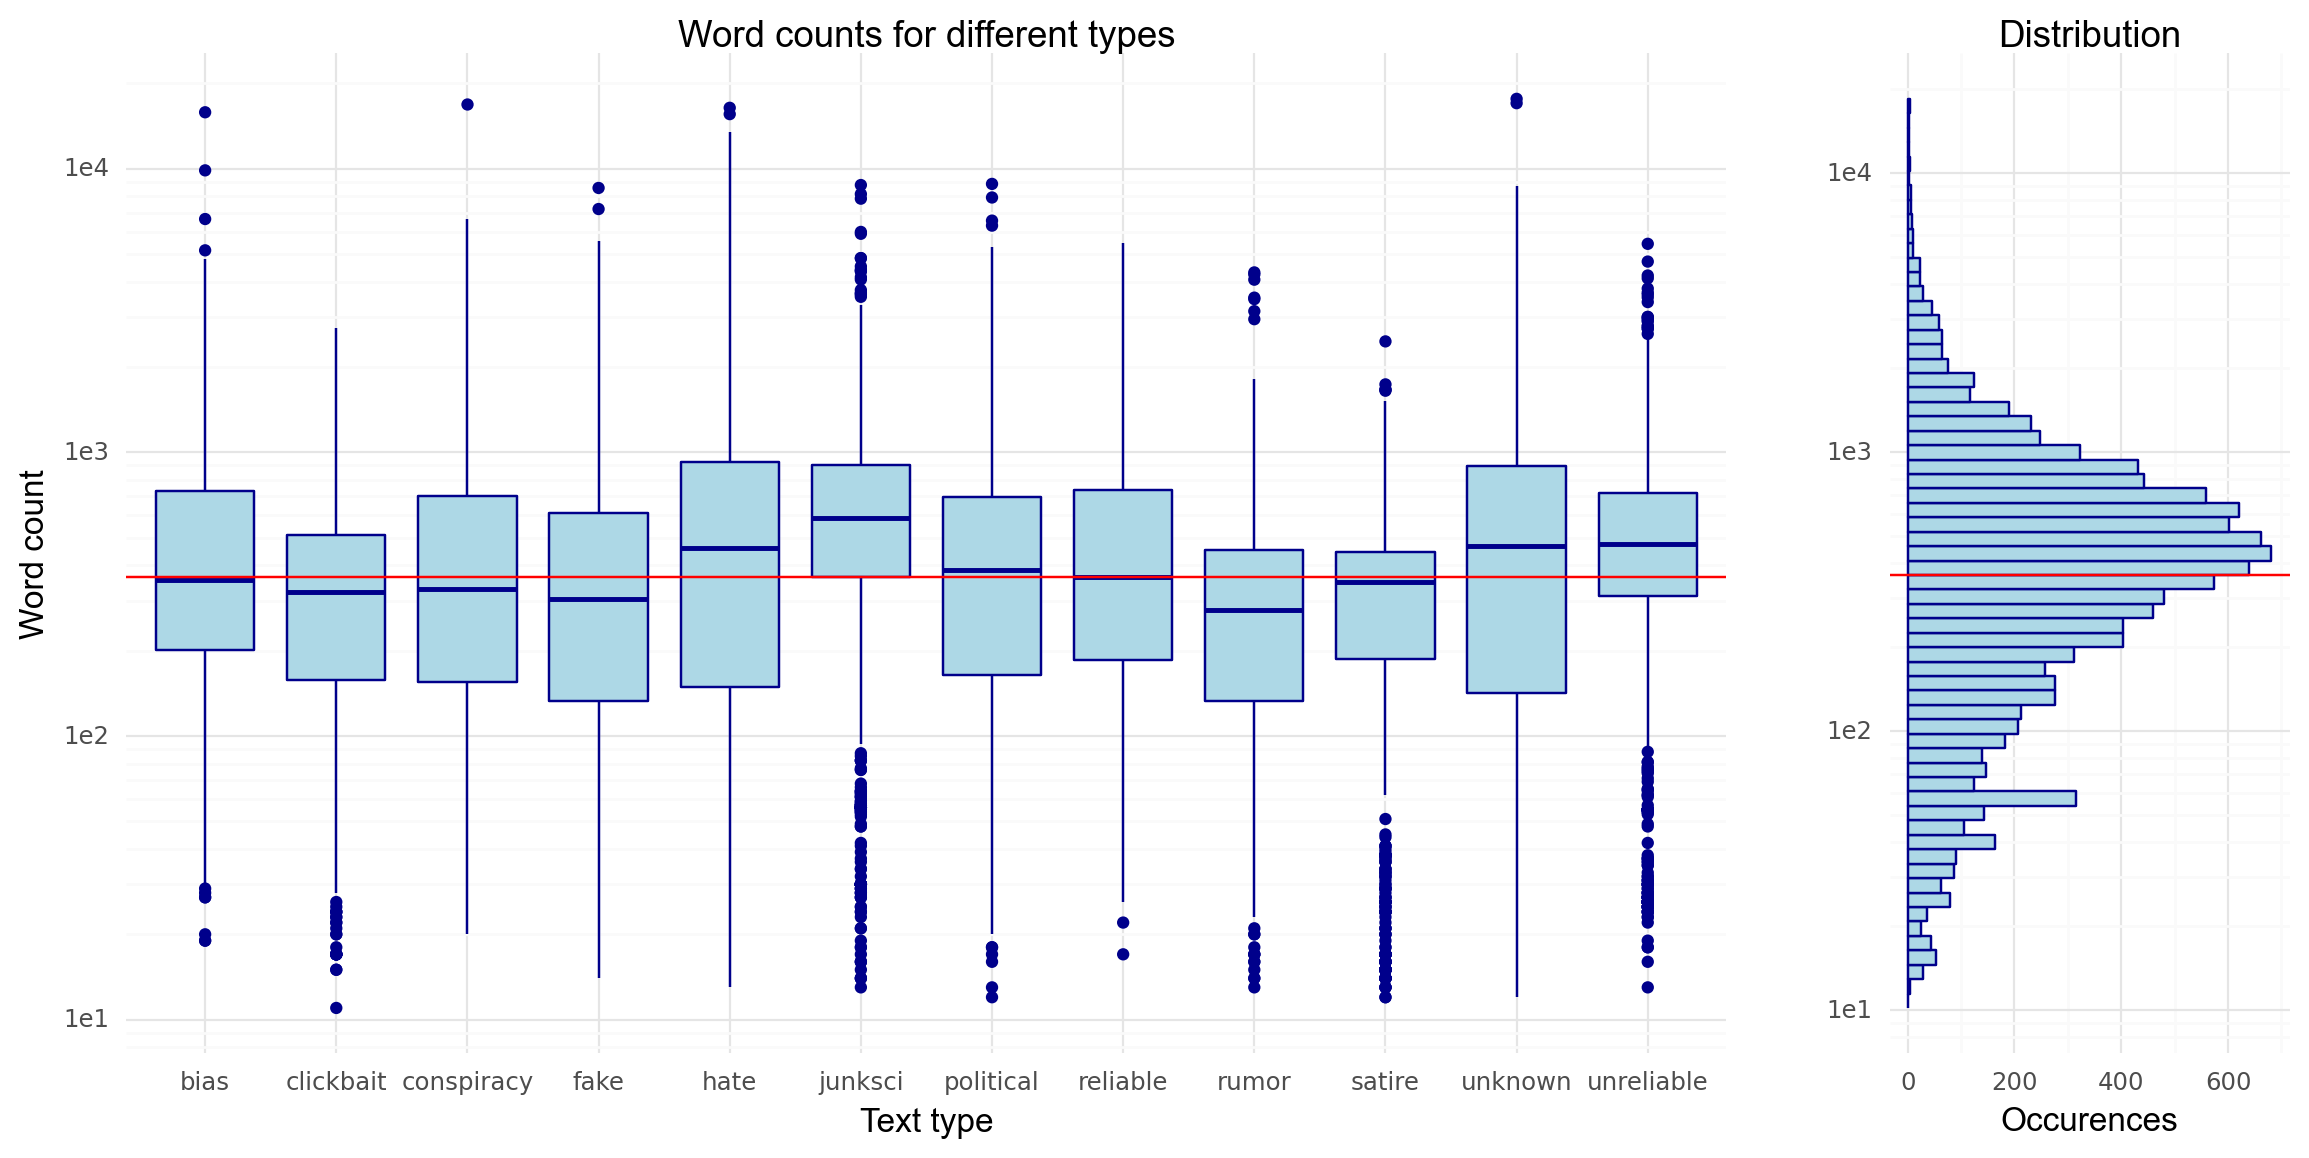

In [50]:
med = df[df['type'] == 'reliable']['word_count'].median()
p1 = (ggplot(df, aes(y='word_count', x = 'type')) + 
    geom_boxplot(color = 'darkblue', fill = 'lightblue') +
    geom_hline(yintercept = med, colour = 'red') +
    theme_minimal() +
    scale_y_log10() +
    labs(title='Word counts for different types', y='Word count', x='Text type'))

p2 = (ggplot(df, aes(x='word_count')) + 
    geom_histogram(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    geom_vline(xintercept = med, colour = 'red') +
    coord_flip() +
    scale_x_log10() +
    labs(title='Distribution', y='Occurences', x=''))

p1_l = pw.load_ggplot(p1, figsize=(8, 5))
p2_l = pw.load_ggplot(p2, figsize=(2, 5))

(p1_l | p2_l)

## Word density

In case of word density we can see that the distribution follows normal distribution, and that the reliable class is similar to general trend. This time the most similar to reliable class are hate, political, and fake articles, whereas the biggest differences we can see from bias, conspiracy, junkscience, and satire.

The unknown class follows the global distribution.

Considering those two plots we might want to combine some classes, to simplify the final task. It seems, like unknown, political, and reliable classes might be treated as one, or discarded from further analysis.

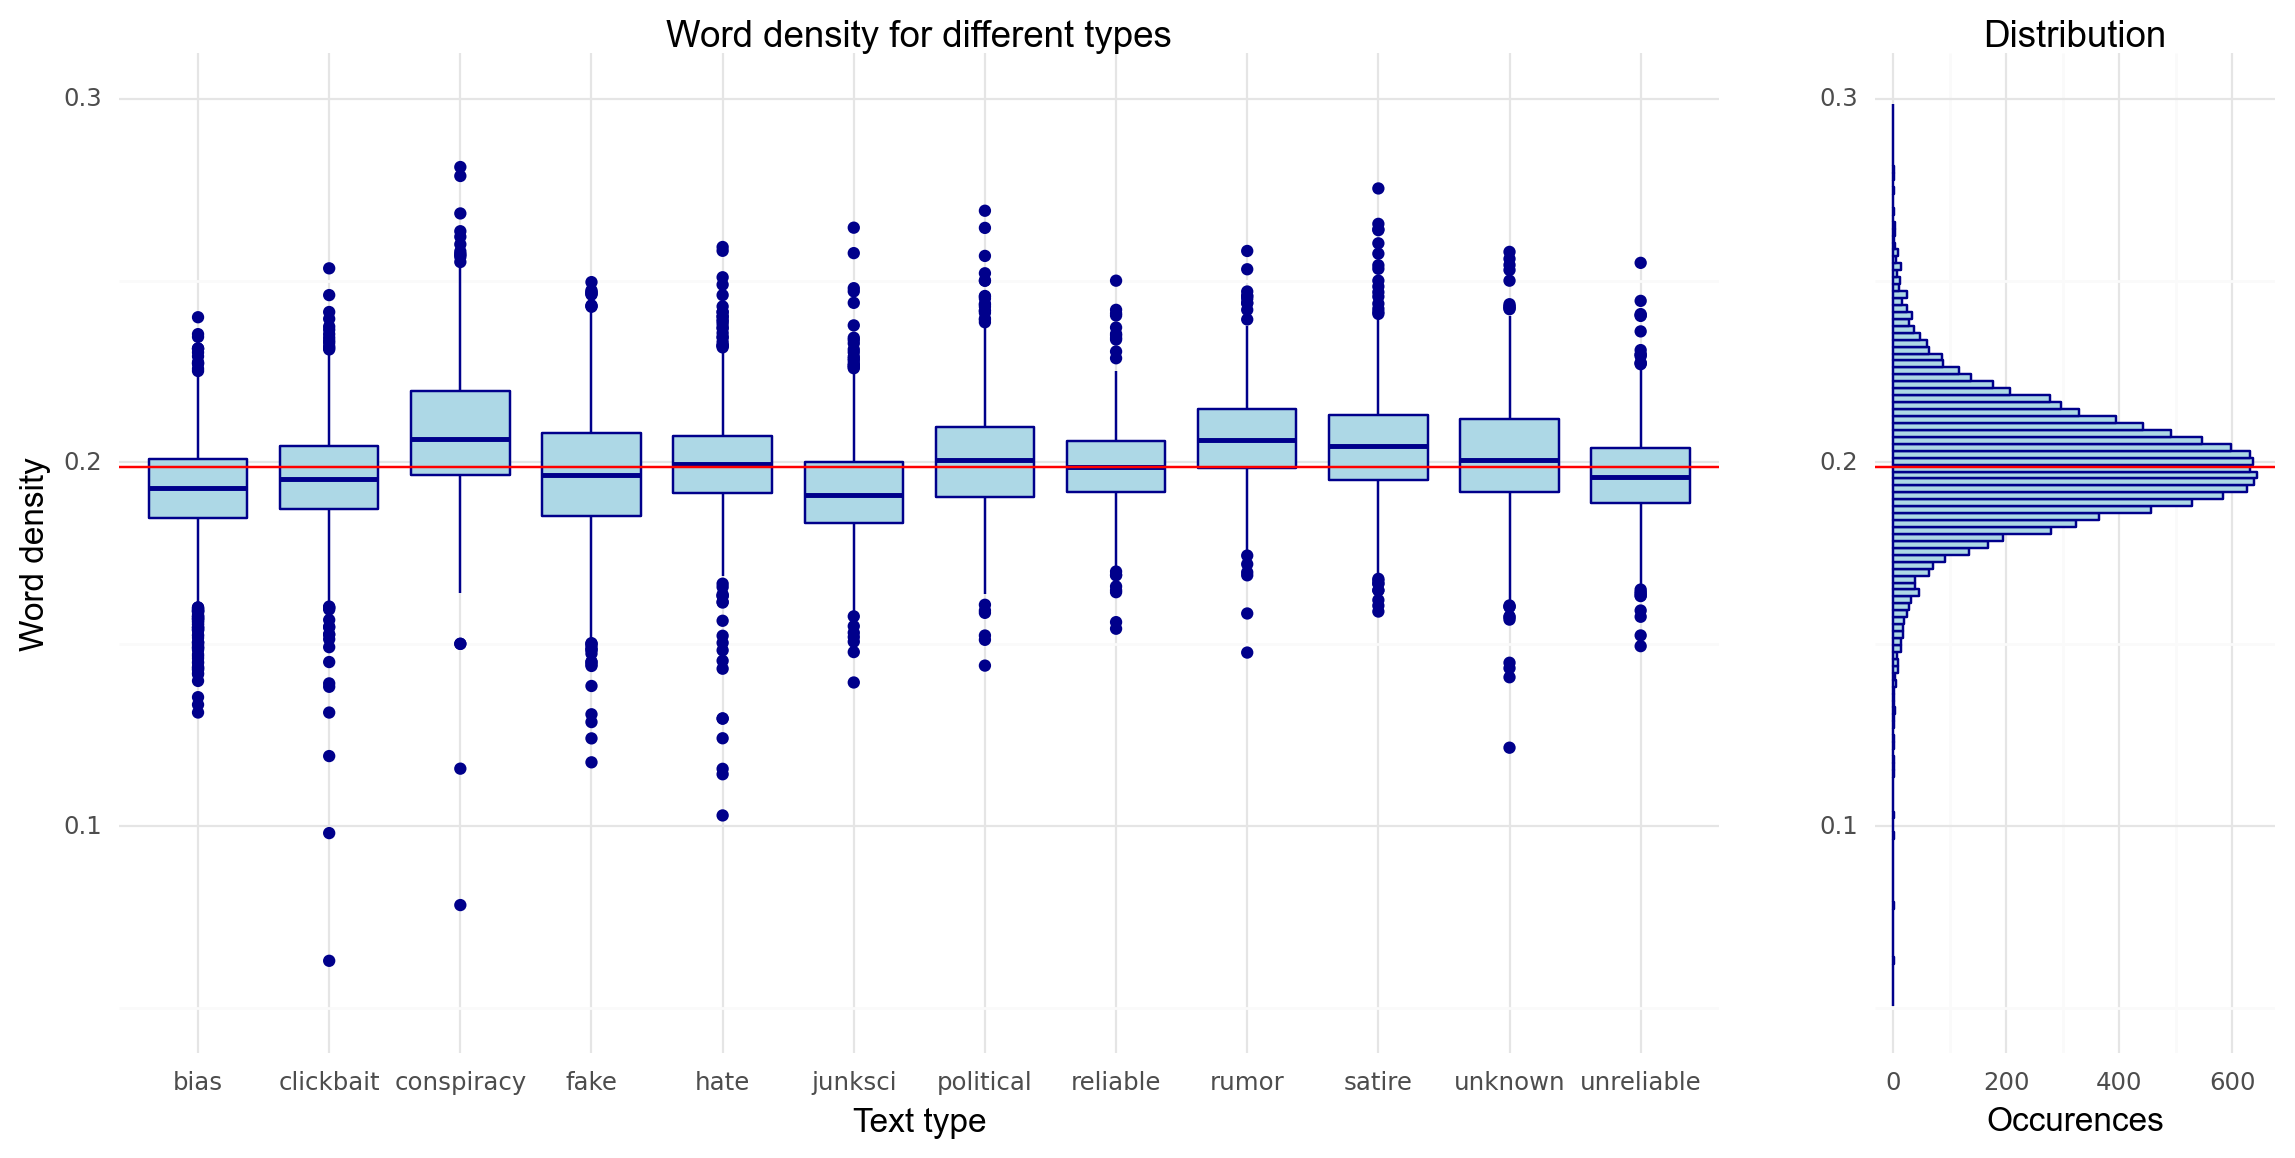

In [52]:
p9.options.figure_size = (10, 5)
med = df[df['type'] == 'reliable']['word_density'].median()
p3 = (ggplot(df, aes(y='word_density', x = 'type')) + 
    geom_boxplot(color = 'darkblue', fill = 'lightblue') +
    geom_hline(yintercept = med, colour = 'red') +
    theme_minimal() +
    ylim(0.05, 0.3) +
    labs(title='Word density for different types', y='Word density', x='Text type'))

p4 = (ggplot(df, aes(x='word_density')) + 
    geom_histogram(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    geom_vline(xintercept = med, colour = 'red') +
    coord_flip() +
    xlim(0.05, 0.3) +
    labs(title='Distribution', y='Occurences', x=''))

p3_l = pw.load_ggplot(p3, figsize=(8, 5))
p4_l = pw.load_ggplot(p4, figsize=(2, 5))

(p3_l | p4_l)

# Popular nouns

Only 7 out of 45 most popular nouns are meaningfull and could be useful for creating topics. It is a small number, so maybe the extraction of nouns is not too useful.

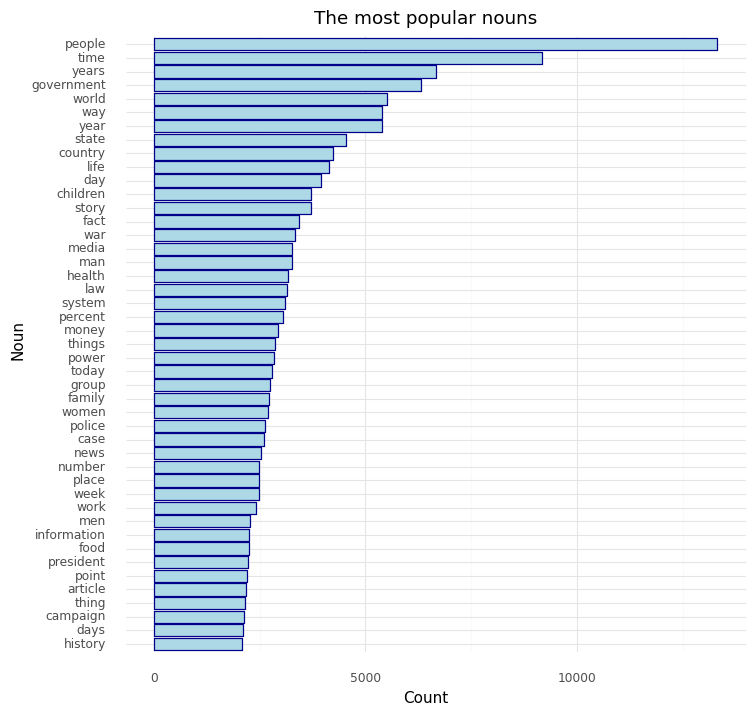

<ggplot: (149017174845)>

In [21]:
p9.options.figure_size = (8, 8)
nouns        = eda.get_nouns(docs)
noun_freq    = Counter(nouns)
common_nouns = noun_freq.most_common(45)
count_nouns  = pd.DataFrame(common_nouns, columns = ['noun', 'count'])

nouns_list   = count_nouns['noun'][::-1]
nouns_cat    = pd.Categorical(count_nouns['noun'], categories = nouns_list)
count_nouns  = count_nouns.assign(nouns_cat = nouns_cat)

(
    ggplot(count_nouns, aes(x='nouns_cat', y='count')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='The most popular nouns', y='Count', x='Noun')
)


# Named Entities

Named entities can clearly show us the big players in the debate from our dataset. It is mostly dominated by american government (14/30), and the rest represent other countries. Additionally it shows that our data source is heavily politically driven dataset.

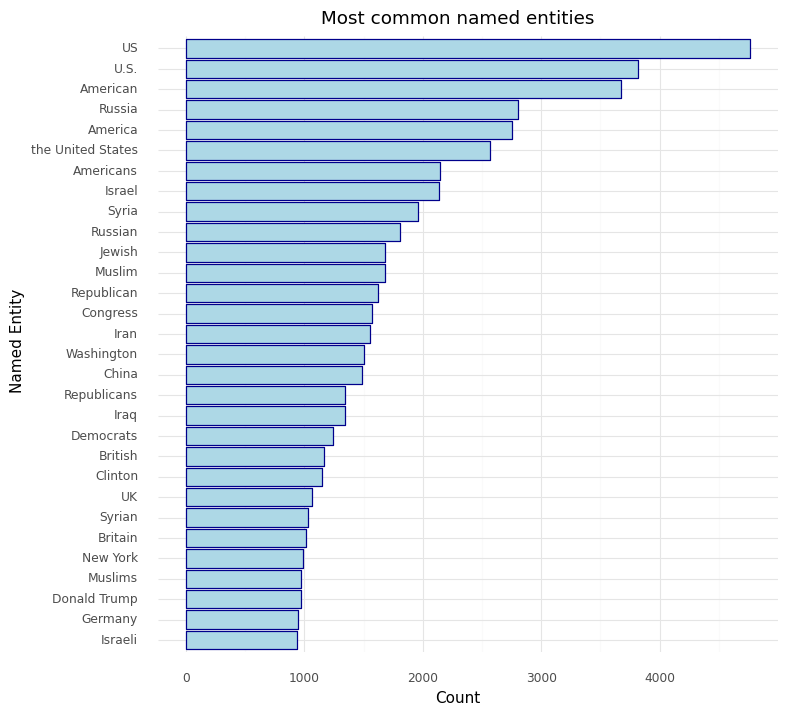

<ggplot: (149224851291)>

In [22]:
p9.options.figure_size = (8, 8)
proper_ets = eda.organisation_like_entitites(docs)
count_ent  = proper_ets.value_counts()
count_ent  = count_ent.reset_index()
count_ent.columns = ["entity","type","count"]
count_ent  = count_ent[:30]

llist  = count_ent['entity'][::-1]
cat    = pd.Categorical(count_ent['entity'], categories = llist)
count  = count_ent.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='count')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Most common named entities', y='Count', x='Named Entity')
)

 # TF-IDF

## Global

Firstly, let's discuss the visualization below. We calculated tf-idf values for each term in each article. later for a single article we outlined 10 terms that got the highest scores, and placed them in the table. The plot below shows us in how many articles given term occured in the top 10.

In thiscase we can see that USA political aspects are clearly ones of the biggest importance, but additionally we can clearly see which topics are important: obama vs trump, possible war with russia, Eastern threat (muslims, iran, israel), school (system or shootings).

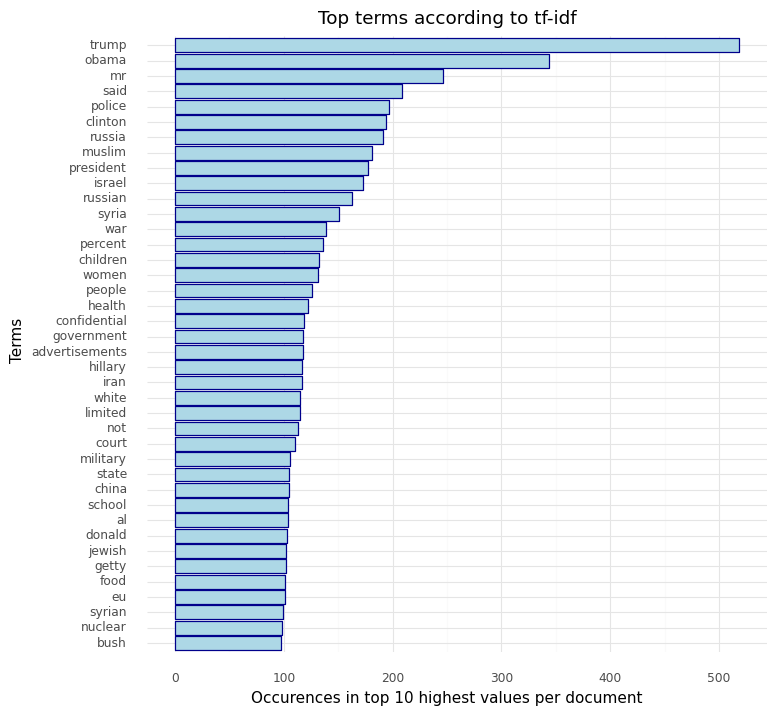

<ggplot: (149224858727)>

In [23]:
p9.options.figure_size = (8, 8)
count_terms = eda.counts_tfidf(tfidf.iloc[:, 1:])[:45]

llist  = count_terms['term'][::-1]
cat    = pd.Categorical(count_terms['term'], categories = llist)
count  = count_terms.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='count')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top terms according to tf-idf', y='Occurences in top 10 highest values per document', x='Terms')
)

## Per class

This time we wanted to provide a better charcteristic per news type, and which topics are the most popular among given category. In general we can describe such focus areas:

1. Rumors - Political discussions regarding Ohio.
2. Satire - President election in USA. (Trump centered)
3. Conspiracy - President election in USA. (Illegal voting) 
4. Reliable - President election in USA. 
5. Junk Science - President election in USA. (Obama)
6. Unreliable - President election in USA. (All president candidates)
7. Political - President election in USA.
8. Bias - Taxes, rights for guns, and Trump. (Taxes)
9. Unknown - President election in USA.
10. Clickbait - President election in USA.
12. Hate - Russia.
11. Fake - Russia.

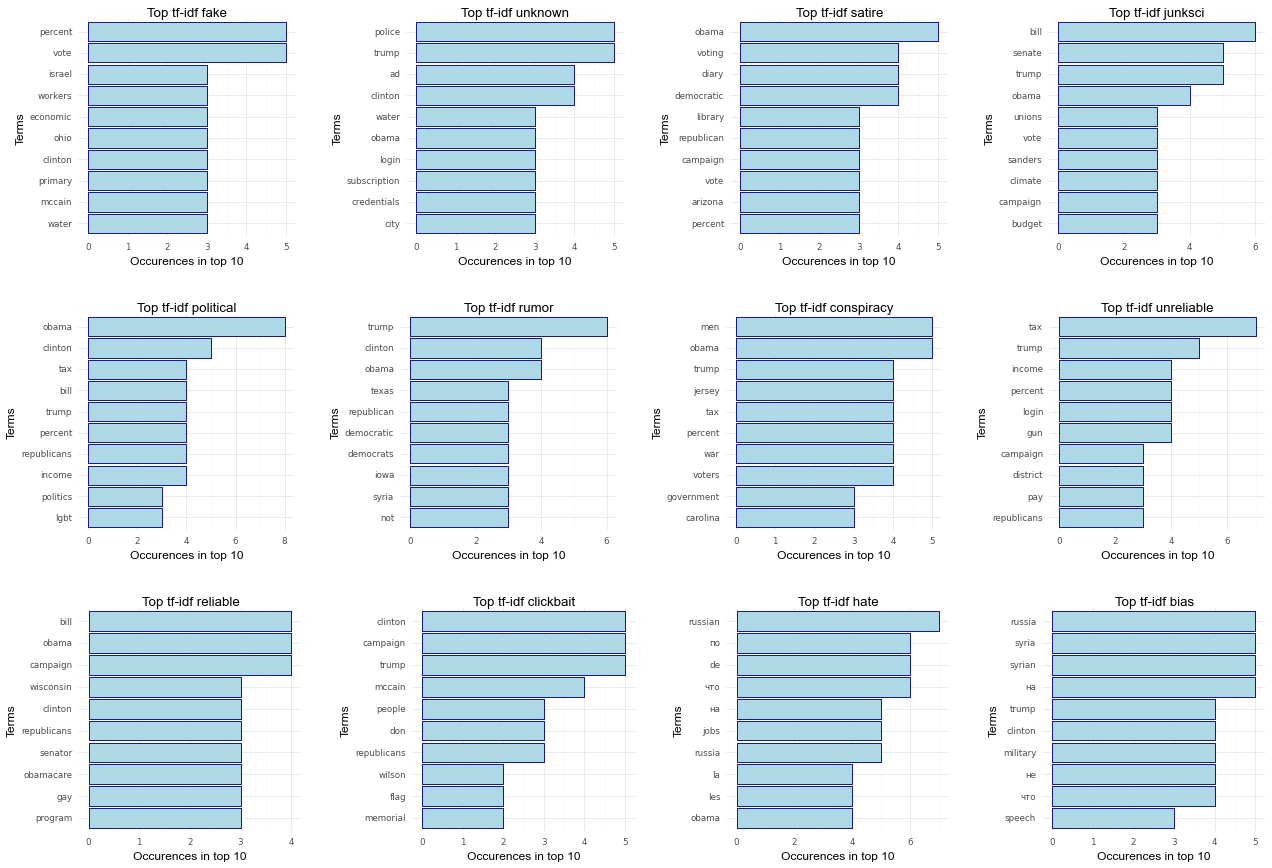

In [6]:
p9.options.figure_size = (8, 8)

def unique(list1):
    list_set = set(list1)
    unique_list = (list(list_set))
    return unique_list

types = unique(df['type'].reset_index(drop = True).to_list())
tf    = tfidf.iloc[:, 1:]
plots = []
load  = []

for i in range(12):
    count_terms = eda.counts_tfidf(tf.iloc[:,(0 + (100 * i * 2)):(200 + (100 * i * 2))])[:10]

    llist  = count_terms['term'][::-1]
    cat    = pd.Categorical(count_terms['term'], categories = llist)
    count  = count_terms.assign(cat = cat)

    p = (ggplot(count, aes(x='cat', y='count')) + 
        geom_col(color = 'darkblue', fill = 'lightblue') +
        theme_minimal() +
        coord_flip() +
        labs(title='Top tf-idf '+str(types[i]), y='Occurences in top 10', x='Terms'))
    plots.append(p)
    load.append(pw.load_ggplot(p, figsize=(3, 3)))

fig = (load[0] | load[1] | load[2] | load[3]) / (load[4] | load[5] | load[6] | load[7]) / (load[8] | load[9] | load[10] | load[11])
fig.savefig()

# Ngrams

## Bi-grams

We can see that the most urgent matters mentioned by bi-grams are connected to the politics in the USA

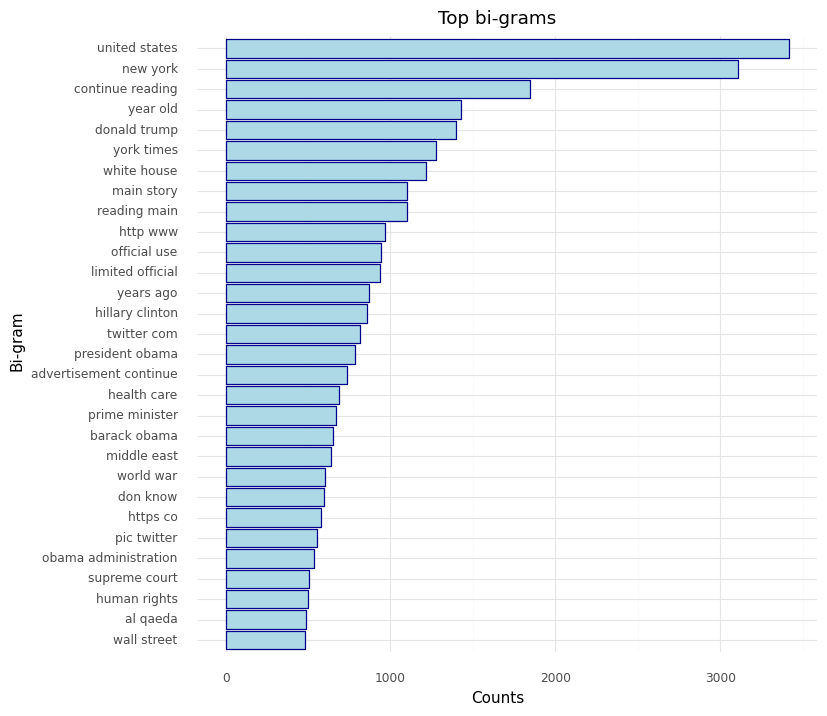

<ggplot: (149233648430)>

In [26]:
p9.options.figure_size = (8, 8)
stopwords     = en.Defaults.stop_words
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 2, m = 2)[:45]
x, y = map(list,zip(*top_n_bigrams))
ngram = pd.DataFrame({'x': x, 'y': y})

llist  = ngram['x'][::-1]
cat    = pd.Categorical(ngram['x'], categories = llist)
count  = ngram.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='y')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top bi-grams', y='Counts', x='Bi-gram')
)

## Tri-grams

The tri-grams, on the other hand captured less relevant phrases which are used in the articles.

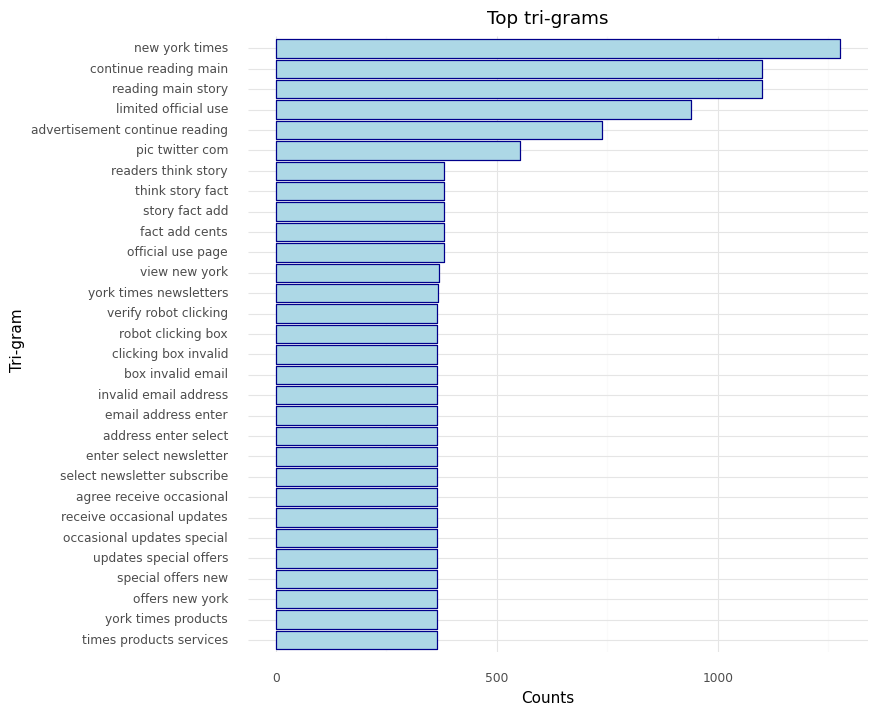

<ggplot: (149170990633)>

In [27]:
p9.options.figure_size = (8, 8)
stopwords     = en.Defaults.stop_words
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 3, m = 3)[:45]
x, y = map(list,zip(*top_n_bigrams))
ngram = pd.DataFrame({'x': x, 'y': y})

llist  = ngram['x'][::-1]
cat    = pd.Categorical(ngram['x'], categories = llist)
count  = ngram.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='y')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top tri-grams', y='Counts', x='Tri-gram')
)

## 2-5 grams

The final group of n-grams mostly consisted of the phrases from the bi-grams, and doesn't give any additional insight.

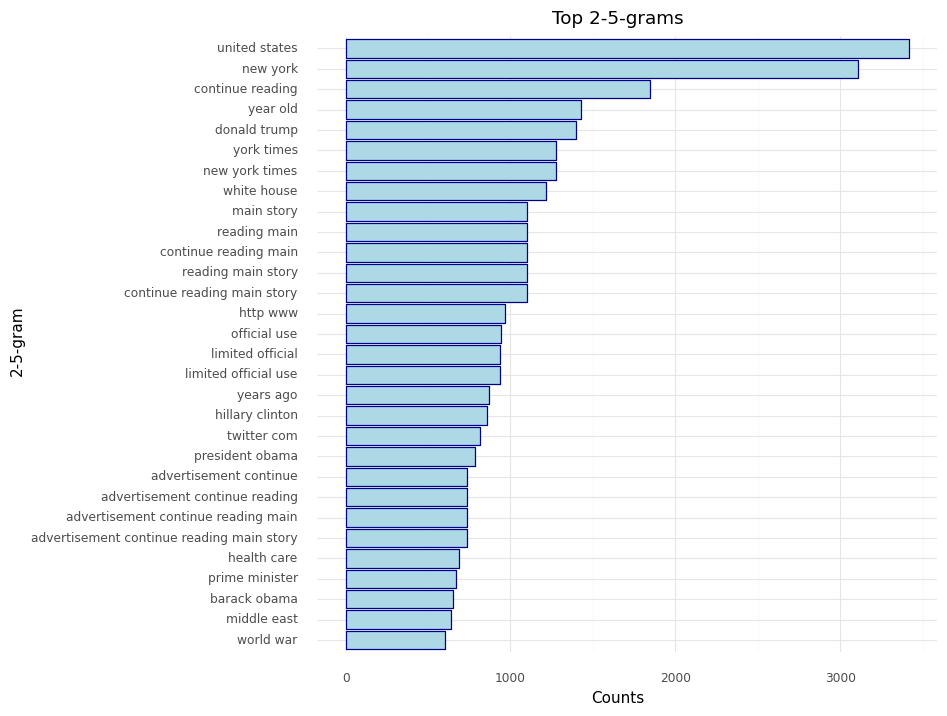

<ggplot: (149231153723)>

In [28]:
p9.options.figure_size = (8, 8)
stopwords     = en.Defaults.stop_words
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 2, m = 5)[:45]
x, y = map(list,zip(*top_n_bigrams))
ngram = pd.DataFrame({'x': x, 'y': y})

llist  = ngram['x'][::-1]
cat    = pd.Categorical(ngram['x'], categories = llist)
count  = ngram.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='y')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top 2-5-grams', y='Counts', x='2-5-gram')
)

# Noun chunks

## With stopwords

Raw noun chunks are almost all starting with 'the' which is not intereseting, thus we should remove the stopwords in that case.

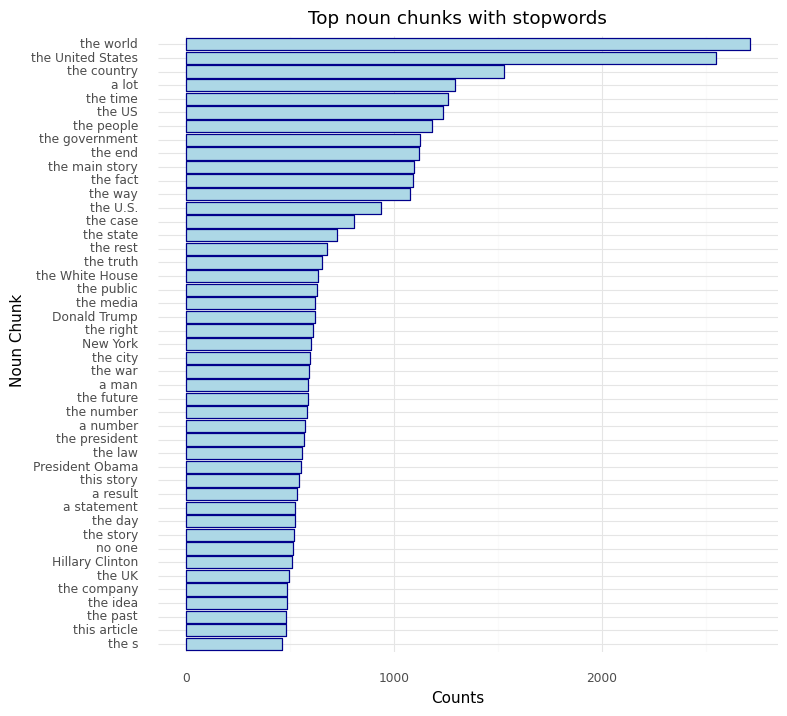

<ggplot: (149648483689)>

In [29]:
p9.options.figure_size = (8, 8)
noun_chunks = eda.get_noun_chunks(docs, stopwords = False)
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = eda.count_texts(noun_chunks,['chunk', 'count'], 45)

llist  = count_chunks['chunk'][::-1]
cat    = pd.Categorical(count_chunks['chunk'], categories = llist)
count  = count_chunks.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='count')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top noun chunks with stopwords', y='Counts', x='Noun Chunk')
)

## Without stopwords

The noun chunks, further outline the topics regarding USA political scene, however they additionally give us more insight into different topics, such us the impact of social media, World War II, climate changes, Wall Street, the importance of free speechm or issues regarding the police officers. Unfortunately they are still surpressed by the most common political scene.

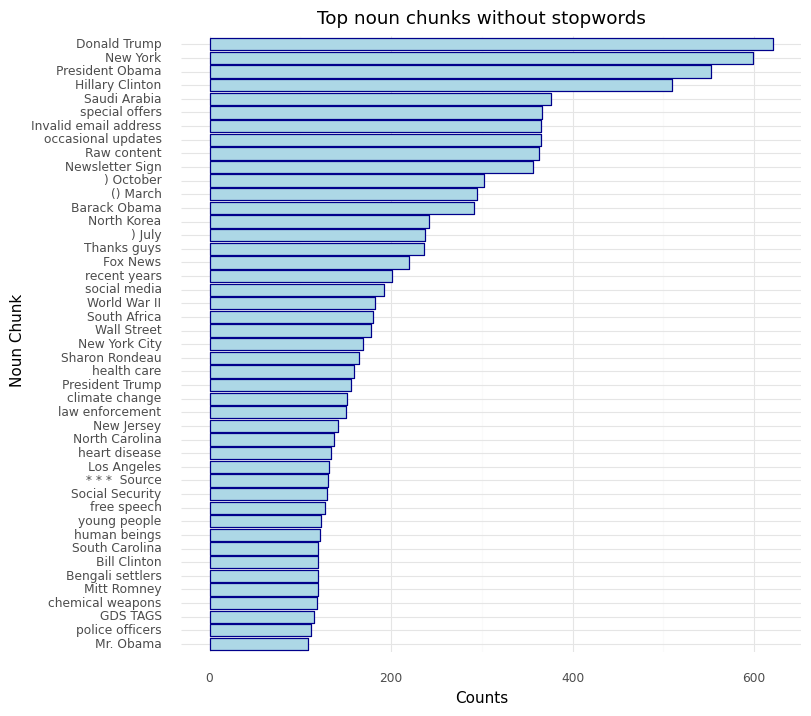

<ggplot: (149224859399)>

In [30]:
p9.options.figure_size = (8, 8)
noun_chunks = eda.get_noun_chunks(docs, stopwords = True)
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = eda.count_texts(noun_chunks,['chunk', 'count'], 45)

llist  = count_chunks['chunk'][::-1]
cat    = pd.Categorical(count_chunks['chunk'], categories = llist)
count  = count_chunks.assign(cat = cat)

(
    ggplot(count, aes(x='cat', y='count')) + 
    geom_col(color = 'darkblue', fill = 'lightblue') +
    theme_minimal() +
    coord_flip() +
    labs(title='Top noun chunks without stopwords', y='Counts', x='Noun Chunk')
)

# Sentiment

Finally we analyzed the sentiment in terms of polarity and subjectivity. Interestingly, the reliable sources have one of the highest median polarity value, very similar to the fake news, wheras the categories like bias, or hate are closer to 0.

It is much different in terms of subjectivity, where reliable news sources has almost the lowest scores, despite the bias category.

All in all, the sentiment analyses might not be so usefull as the scores are fairly similar among the groups, and not necesarily include reliable values.

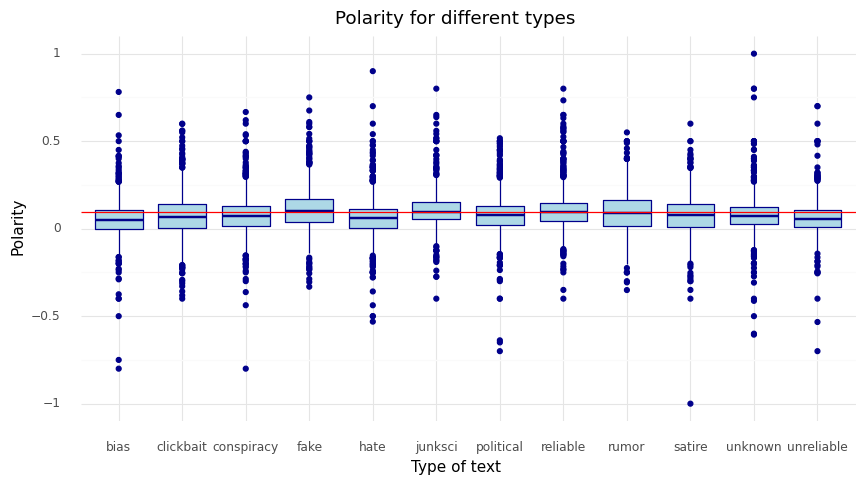

<ggplot: (149269514646)>

In [31]:
p9.options.figure_size = (10, 5)
med = df[df['type'] == 'reliable']['polarity'].median()
(
    ggplot(df) +
    aes(x='type', y='polarity') +
    geom_boxplot(color = 'darkblue', fill = 'lightblue') +
    geom_hline(yintercept = med, colour = 'red') +
    theme_minimal() +
    labs(title='Polarity for different types', x='Type of text', y='Polarity')
)

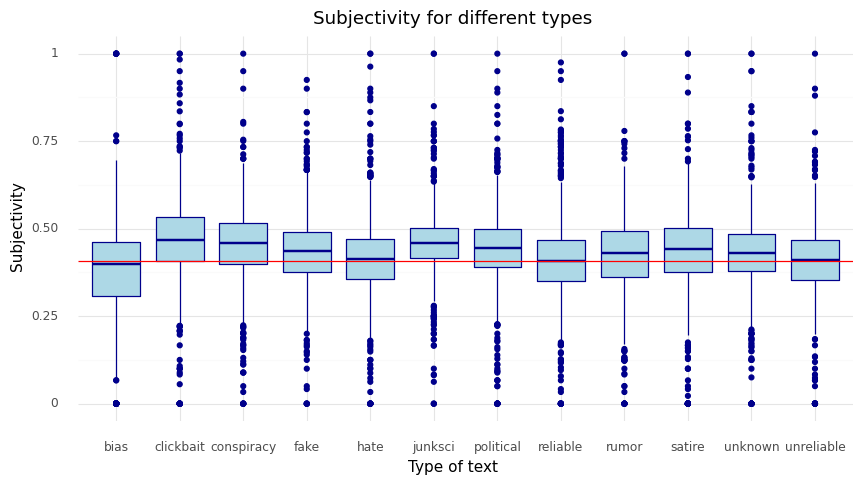

<ggplot: (149269512063)>

In [32]:
p9.options.figure_size = (10, 5)
med = df[df['type'] == 'reliable']['subjectivity'].median()
(
    ggplot(df) +
    aes(x='type', y='subjectivity') +
    geom_boxplot(color = 'darkblue', fill = 'lightblue') +
    geom_hline(yintercept = med, colour = 'red') +
    theme_minimal() +
    labs(title='Subjectivity for different types', x='Type of text', y='Subjectivity')
)